**Exercise:** In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, `lam`, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of `lam`, then computes their mean error and RMSE.

Is this way of making an estimate biased?

In [1]:
from __future__ import print_function, division
%matplotlib inline
import numpy as np
import brfss
import thinkstats2
import thinkplot
import math
import random

def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

def SimulateGame(lam):
    """Simulates a game and returns the estimated goal-scoring rate.

    lam: actual goal scoring rate in goals per game
    """
    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1

    # estimated goal-scoring rate is the actual number of goals scored
    L = goals
    return L

In [2]:
'''
Write another function that simulates many games, 
stores the estimates of lam, 
then computes their mean error and RMSE.
'''
lam = 5
n_games = 1000
goals_per_game = []

def SimulateManyGames(lam, n_games):    
    for game in range(n_games):
        goals_per_game.append(SimulateGame(lam))

    print('Mean error: {:.2f}'.format(MeanError(goals_per_game, lam)))
    print('RMSE: {:.2f}'.format(RMSE(goals_per_game, lam)))

Simulating 1000 games with lambda = 5:
Mean error: -0.05
RMSE: 2.17


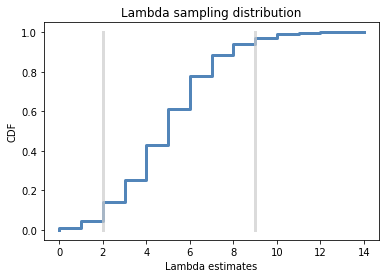

In [3]:
'''
Is this way of making an estimate biased? 
Plot the sampling distribution of the estimates and the 90% confidence interval. 
What is the standard error?
What happens to sampling error for increasing values of lam?
'''

print('Simulating {} games with lambda = {}:'.format(n_games, lam))
SimulateManyGames(lam, n_games)

cdf = thinkstats2.Cdf(goals_per_game)
ci = cdf.Percentile(5), cdf.Percentile(95)
thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
VertLine(ci[0])
VertLine(ci[1])
thinkplot.Config(xlabel='Lambda estimates', ylabel='CDF', title='Lambda sampling distribution')    

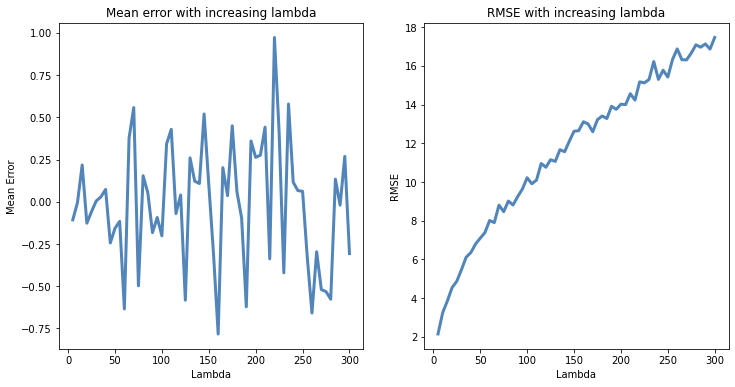

In [4]:
lams = [_ for _ in range(5,305,5)]
n_games = 1000
ME_list = []
RMSE_list = []

for lam in lams:
    goals_per_game = []
    for game in range(n_games):
        goals_per_game.append(SimulateGame(lam))
    ME_list.append(MeanError(goals_per_game, lam))
    RMSE_list.append(RMSE(goals_per_game, lam))

thinkplot.PrePlot(2, cols=2)
thinkplot.Plot(lams, ME_list)
thinkplot.Config(xlabel='Lambda', ylabel='Mean Error', title='Mean error with increasing lambda')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Plot(lams, RMSE_list)
thinkplot.Config(xlabel='Lambda', ylabel='RMSE', title='RMSE with increasing lambda')



As lambda increases, mean error increases stocastically and RMSE generally increases consistently. Since neither measurement of error converges to 0 as lambda increases, this suggests that using exponentially distributed values is a biased way to estimate lambda.